In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 1) Importing Dataset for Sales Dataset and Ingredients Dataset


In [ ]:
sales = pd.read_csv('/content/drive/MyDrive/Project/5.Dominos/Pizza_Sale - pizza_sales.csv')
ingredients = pd.read_csv('/content/drive/MyDrive/Project/5.Dominos/Pizza_ingredients - Pizza_ingredients.csv')

In [ ]:
sales.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [ ]:
ingredients.head()

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0




# 2) Data Cleaning & Data Preprocessing



## Sales Dataset

In [ ]:
sales.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [ ]:
sales.shape

(48620, 12)

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


### 1. Filling null values for Total_price --- [Total price = Quantity * Unit_Price].

In [ ]:
sales.isnull().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,16
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,7
pizza_size,0
pizza_category,23


In [ ]:
sales['total_price'].fillna(sales['unit_price'] * sales['quantity'], inplace=True)

In [ ]:
sales['total_price'].isnull().sum()

0

### 2. Filling Missing values for Pizza Categories Based on Pizza Name ID by Map Functions.

In [ ]:
sales.isnull().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,16
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,23


In [ ]:
sales['pizza_category'].isnull().sum()

23

In [ ]:
print(sales.pizza_category.value_counts())
print('------------------------------------')
print(sales.pizza_category.unique())

pizza_category
Classic    14572
Supreme    11771
Veggie     11442
Chicken    10812
Name: count, dtype: int64
------------------------------------
['Classic' 'Veggie' 'Supreme' 'Chicken' nan]


In [ ]:
sales[sales['pizza_category'].isnull()].head(2)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
426,427,181,mexicana_l,1,3/1/2015,18:49:32,20.25,20.25,L,NaN,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
427,428,182,brie_carre_s,1,3/1/2015,18:50:10,23.65,23.65,S,NaN,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",The Brie Carre Pizza


In [ ]:
sales['pizza_name_id'].value_counts()

,count
pizza_name_id,
big_meat_s,1811
thai_ckn_l,1363
five_cheese_l,1358
four_cheese_l,1272
classic_dlx_m,1159
...,...
mexicana_s,160
calabrese_s,99
ckn_alfredo_s,96


In [ ]:
cat_map = sales[['pizza_name_id', 'pizza_category']].dropna().drop_duplicates()
cat_map = cat_map.set_index('pizza_name_id')['pizza_category'].to_dict()

sales['pizza_category'] = sales['pizza_category'].fillna(sales['pizza_name_id'].map(cat_map))

In [ ]:
sales['pizza_category'].isnull().sum()

0

In [ ]:
sales.shape

(48620, 12)

### 3. Filling Missing values for Pizza ingredients values Based on Pizza Name ID by Map Functions.

In [ ]:
sales.isnull().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,16
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


In [ ]:
sales[sales['pizza_ingredients'].isnull()].head(2)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
580,581,254,five_cheese_l,1,4/1/2015,22:22:13,18.5,18.5,L,Veggie,NaN,The Five Cheese Pizza
581,582,255,five_cheese_l,1,5/1/2015,11:23:35,18.5,18.5,L,Veggie,NaN,The Five Cheese Pizza


In [ ]:
sales['pizza_ingredients'].isnull().sum()

13

In [ ]:
ing_map = sales[['pizza_name', 'pizza_ingredients']].dropna().drop_duplicates()
ing_map = ing_map.set_index('pizza_name')['pizza_ingredients'].to_dict()

sales['pizza_ingredients'] = sales['pizza_ingredients'].fillna(sales['pizza_name'].map(ing_map))

In [ ]:
sales['pizza_ingredients'].isnull().sum()

0

### 4. Filling Missing values for Pizza Name to fill Pizza ingredients by using Map


In [ ]:
sales.isnull().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,16
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


In [ ]:
sales['pizza_name'].isnull().sum()

7

In [ ]:
sales[sales['pizza_name'].isnull()].head(2)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
688,689,303,pepperoni_s,1,5/1/2015,20:02:51,9.75,9.75,S,Classic,"Mozzarella Cheese, Pepperoni",NaN
689,690,304,hawaiian_s,1,5/1/2015,20:07:58,10.50,10.50,S,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",NaN


In [ ]:
sales['pizza_name_id'].isnull().sum()

16

In [ ]:
name_id_map = sales[['pizza_ingredients', 'pizza_name']].dropna().drop_duplicates()
name_id_map = name_id_map.set_index('pizza_ingredients')['pizza_name'].to_dict()

sales['pizza_name'] = sales['pizza_name'].fillna(sales['pizza_ingredients'].map(name_id_map))

In [ ]:
sales['pizza_name'].isnull().sum()

0

In [ ]:
sales.isnull().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,16
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


### 5. Filling Pizza name id from Pizza name by using Map function

In [ ]:
sales.isnull().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,16
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


In [ ]:
sales[sales['pizza_name_id'].isnull()].head(8)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
36,37,15,NaN,1,1/1/2015,13:33:00,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
37,38,15,NaN,1,1/1/2015,13:33:00,20.75,20.75,L,Supreme,"Soppressata Salami, Fontina Cheese, Mozzarella...",The Soppressata Pizza
38,39,15,NaN,1,1/1/2015,13:33:00,12.00,12.00,S,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",The Greek Pizza
39,40,16,NaN,1,1/1/2015,13:34:07,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
40,41,16,NaN,1,1/1/2015,13:34:07,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
41,42,16,NaN,1,1/1/2015,13:34:07,20.75,20.75,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
309,310,131,NaN,1,2/1/2015,21:33:10,12.00,12.00,S,Veggie,"Spinach, Mushrooms, Tomatoes, Green Olives, Fe...",The Green Garden Pizza
310,311,131,NaN,1,2/1/2015,21:33:10,12.50,12.50,S,Supreme,"Spinach, Red Onions, Pepperoni, Tomatoes, Arti...",The Spinach Supreme Pizza


In [ ]:
name_id_map = sales[['pizza_name', 'pizza_name_id']].dropna().drop_duplicates()
name_id_map = name_id_map.set_index('pizza_name')['pizza_name_id'].to_dict()

sales['pizza_name_id'] = sales['pizza_name_id'].fillna(sales['pizza_name'].map(name_id_map))

In [ ]:
sales.isnull().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,0
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


## Ingredients Dataset

In [ ]:
ingredients.columns

Index(['pizza_name_id', 'pizza_name', 'pizza_ingredients',
       'Items_Qty_In_Grams'],
      dtype='object')

In [ ]:
ingredients.shape

(518, 4)

In [ ]:
ingredients.head()

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0


In [ ]:
ingredients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pizza_name_id       518 non-null    object 
 1   pizza_name          518 non-null    object 
 2   pizza_ingredients   518 non-null    object 
 3   Items_Qty_In_Grams  514 non-null    float64
dtypes: float64(1), object(3)
memory usage: 16.3+ KB


In [ ]:
ingredients.isna().sum()

,0
pizza_name_id,0
pizza_name,0
pizza_ingredients,0
Items_Qty_In_Grams,4


In [ ]:
ingredients.duplicated().sum()

0

In [ ]:
ingredients.head()

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0


In [ ]:
ingredients[ingredients['Items_Qty_In_Grams'].isnull()]

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
24,brie_carre_s,The Brie Carre Pizza,Caramelized Onions,NaN
149,hawaiian_l,The Hawaiian Pizza,Sliced Ham,NaN
152,hawaiian_m,The Hawaiian Pizza,Sliced Ham,NaN
155,hawaiian_s,The Hawaiian Pizza,Sliced Ham,NaN


In [ ]:
ingredients[ingredients['pizza_name']=='The Brie Carre Pizza']

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
22,brie_carre_s,The Brie Carre Pizza,Brie Carre Cheese,30.0
23,brie_carre_s,The Brie Carre Pizza,Prosciutto,30.0
24,brie_carre_s,The Brie Carre Pizza,Caramelized Onions,NaN
25,brie_carre_s,The Brie Carre Pizza,Pears,10.0
26,brie_carre_s,The Brie Carre Pizza,Thyme,5.0
27,brie_carre_s,The Brie Carre Pizza,Garlic,5.0


In [ ]:
ingredients[ingredients['pizza_ingredients']=='Sliced Ham']

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
149,hawaiian_l,The Hawaiian Pizza,Sliced Ham,NaN
152,hawaiian_m,The Hawaiian Pizza,Sliced Ham,NaN
155,hawaiian_s,The Hawaiian Pizza,Sliced Ham,NaN


In [ ]:
ingredients[ingredients['pizza_name_id']=='hawaiian_l']

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
149,hawaiian_l,The Hawaiian Pizza,Sliced Ham,NaN
150,hawaiian_l,The Hawaiian Pizza,Pineapple,45.0
151,hawaiian_l,The Hawaiian Pizza,Mozzarella Cheese,30.0


In [ ]:
ingredients.pizza_name.value_counts()

,count
pizza_name,
The Greek Pizza,30
The Mexicana Pizza,24
The Southwest Chicken Pizza,24
The Spinach Supreme Pizza,24
The Vegetables + Vegetables Pizza,24
The Mediterranean Pizza,21
The California Chicken Pizza,21
The Italian Vegetables Pizza,21
The Chicken Alfredo Pizza,18


In [ ]:
meanofPizza = ingredients.groupby('pizza_name')['Items_Qty_In_Grams'].mean()
ingredients['Items_Qty_In_Grams'].fillna(ingredients['pizza_name'].map(meanofPizza), inplace=True)

In [ ]:
ingredients.isnull().sum()

,0
pizza_name_id,0
pizza_name,0
pizza_ingredients,0
Items_Qty_In_Grams,0




# 3) Merging sales dataset and ingredients dataset into a single dataframe

* Feature Engineering: Create relevant features from the sales data, such as
day of the week, month, promotional periods, and holiday effects.




In [ ]:
df = pd.merge(sales, ingredients, on='pizza_name_id', how='left')

In [ ]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients_x,pizza_name_x,pizza_name_y,pizza_ingredients_y,Items_Qty_In_Grams
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,The Hawaiian Pizza,Sliced Ham,25.0
1,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,The Hawaiian Pizza,Pineapple,30.0
2,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,The Hawaiian Pizza,Mozzarella Cheese,20.0
3,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,The Classic Deluxe Pizza,Pepperoni,40.0
4,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,The Classic Deluxe Pizza,Mushrooms,40.0


In [ ]:
print(df.duplicated().sum())
print(df.shape)
print(' ')
print(df.isnull().sum())

0
(267576, 15)
 
pizza_id               0
order_id               0
pizza_name_id          0
quantity               0
order_date             0
order_time             0
unit_price             0
total_price            0
pizza_size             0
pizza_category         0
pizza_ingredients_x    0
pizza_name_x           0
pizza_name_y           0
pizza_ingredients_y    0
Items_Qty_In_Grams     0
dtype: int64




# 4) Feature Engineering and Data Cleaning for Merged data Df



### 1--)  Data Cleaning





In [ ]:
df[['pizza_name_x','pizza_name_y']]

,pizza_name_x,pizza_name_y
0,The Hawaiian Pizza,The Hawaiian Pizza
1,The Hawaiian Pizza,The Hawaiian Pizza
2,The Hawaiian Pizza,The Hawaiian Pizza
3,The Classic Deluxe Pizza,The Classic Deluxe Pizza
4,The Classic Deluxe Pizza,The Classic Deluxe Pizza
...,...,...
267571,The Barbecue Chicken Pizza,The Barbecue Chicken Pizza
267572,The Barbecue Chicken Pizza,The Barbecue Chicken Pizza
267573,The Barbecue Chicken Pizza,The Barbecue Chicken Pizza
267574,The Barbecue Chicken Pizza,The Barbecue Chicken Pizza


In [ ]:
df[['pizza_ingredients_x','pizza_ingredients_y']]


,pizza_ingredients_x,pizza_ingredients_y
0,"Sliced Ham, Pineapple, Mozzarella Cheese",Sliced Ham
1,"Sliced Ham, Pineapple, Mozzarella Cheese",Pineapple
2,"Sliced Ham, Pineapple, Mozzarella Cheese",Mozzarella Cheese
3,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",Pepperoni
4,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",Mushrooms
...,...,...
267571,"Barbecued Chicken, Red Peppers, Green Peppers,...",Red Peppers
267572,"Barbecued Chicken, Red Peppers, Green Peppers,...",Green Peppers
267573,"Barbecued Chicken, Red Peppers, Green Peppers,...",Tomatoes
267574,"Barbecued Chicken, Red Peppers, Green Peppers,...",Red Onions


In [ ]:
# Since they have same values it will be difficult to train so i'm removing the columns
df.drop(['pizza_name_y','pizza_ingredients_y'], axis=1, inplace=True)

In [ ]:
df.rename(columns={'pizza_name_x':'pizza_name', 'pizza_ingredients_x':'pizza_ingredients'}, inplace=True)

In [ ]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name',
       'Items_Qty_In_Grams'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,0
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


In [ ]:
df.shape

(267576, 13)

In [ ]:
df.duplicated().sum()

80204

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(187372, 13)

In [ ]:
# df1 = df.copy()

In [ ]:
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price,Items_Qty_In_Grams
count,187372.000000,187372.000000,187372.000000,187372.000000,187372.000000,187372.000000
mean,24312.676030,10702.312405,1.019250,16.914338,17.244843,37.652904
std,14039.560378,6181.841091,0.141575,3.571451,4.419979,35.704833
min,1.000000,1.000000,1.000000,9.750000,9.750000,5.000000
25%,12166.750000,5344.000000,1.000000,12.750000,12.750000,15.000000
50%,24266.000000,10661.000000,1.000000,16.750000,16.750000,25.000000
75%,36494.250000,16112.250000,1.000000,20.500000,20.750000,45.000000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000,200.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187372 entries, 0 to 267573
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   pizza_id            187372 non-null  int64  
 1   order_id            187372 non-null  int64  
 2   pizza_name_id       187372 non-null  object 
 3   quantity            187372 non-null  int64  
 4   order_date          187372 non-null  object 
 5   order_time          187372 non-null  object 
 6   unit_price          187372 non-null  float64
 7   total_price         187372 non-null  float64
 8   pizza_size          187372 non-null  object 
 9   pizza_category      187372 non-null  object 
 10  pizza_ingredients   187372 non-null  object 
 11  pizza_name          187372 non-null  object 
 12  Items_Qty_In_Grams  187372 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 20.0+ MB


### 2--) Changing Date format and dtype

In [ ]:
# Changing Order_data dtype object into date
if 'order_date' in df.columns:
  df['order_date'] = df['order_date'].str.replace('/', '-')

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y', errors='coerce')

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%m/%d/%Y')

In [ ]:
df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Items_Qty_In_Grams
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,25.0
1,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,30.0
2,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,20.0
3,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,40.0
6,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267565,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,60.0
267567,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,100.0
267570,48620,21350,bbq_ckn_s,1,2015-12-31,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza,20.0
267571,48620,21350,bbq_ckn_s,1,2015-12-31,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza,5.0


In [ ]:
df['order_day_of_week'] = df['order_date'].dt.dayofweek
df['order_month_name'] = df['order_date'].dt.month
df['week_of_year'] = df['order_date'].dt.isocalendar().week
df['order_year'] = df['order_date'].dt.year

In [ ]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Items_Qty_In_Grams,order_day_of_week,order_month_name,week_of_year,order_year
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,25.0,3,1,1,2015
1,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,30.0,3,1,1,2015
2,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,20.0,3,1,1,2015
3,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,40.0,3,1,1,2015
6,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,10.0,3,1,1,2015


### 3--) Holidays of US from the library called Holidays

In [ ]:
import holidays

us_holidays = holidays.US()

df['holiday'] = df['order_date'].apply(lambda x: 1 if x in us_holidays else 0)

df[['order_date', 'holiday']].head()

,order_date,holiday
0,2015-01-01,1
1,2015-01-01,1
2,2015-01-01,1
3,2015-01-01,1
6,2015-01-01,1


### 4--) Promotional Period On weekends

In [ ]:
df['promotion'] = df['order_date'].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)  # 1- sat/sun and 0 - Weekdays
df[['order_date', 'promotion']].sample(10)

,order_date,promotion
131920,2015-06-26,0
157929,2015-07-30,0
250260,2015-12-06,1
258771,2015-12-17,0
70031,2015-04-04,1
12456,2015-01-17,1
42735,2015-02-27,0
162135,2015-08-05,0
26667,2015-02-05,0
129461,2015-06-22,0


In [ ]:
from datetime import datetime

# Define the date
date_str = "2015-10-24"
date_obj = datetime.strptime(date_str, "%Y-%m-%d")

day_of_week = date_obj.strftime("%A")

print(f"The day of the week for {date_str} is {day_of_week}.")


The day of the week for 2015-10-24 is Saturday.


In [ ]:
df.isnull().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,0
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


In [ ]:
df.head(5)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Items_Qty_In_Grams,order_day_of_week,order_month_name,week_of_year,order_year,holiday,promotion
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,25.0,3,1,1,2015,1,0
1,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,30.0,3,1,1,2015,1,0
2,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,20.0,3,1,1,2015,1,0
3,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,40.0,3,1,1,2015,1,0
6,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,10.0,3,1,1,2015,1,0


In [ ]:
# daily sales by quantity

daily_sales_by_quantity = df.groupby('order_date')['quantity'].sum().reset_index()
daily_sales_by_quantity


# daily_sales.set_index('order_date', inplace=True)

,order_date,quantity
0,2015-01-01,620
1,2015-01-02,631
2,2015-01-03,618
3,2015-01-04,414
4,2015-01-05,482
...,...,...
353,2015-12-27,347
354,2015-12-28,381
355,2015-12-29,302
356,2015-12-30,327


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187372 entries, 0 to 267573
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   pizza_id            187372 non-null  int64         
 1   order_id            187372 non-null  int64         
 2   pizza_name_id       187372 non-null  object        
 3   quantity            187372 non-null  int64         
 4   order_date          187372 non-null  datetime64[ns]
 5   order_time          187372 non-null  object        
 6   unit_price          187372 non-null  float64       
 7   total_price         187372 non-null  float64       
 8   pizza_size          187372 non-null  object        
 9   pizza_category      187372 non-null  object        
 10  pizza_ingredients   187372 non-null  object        
 11  pizza_name          187372 non-null  object        
 12  Items_Qty_In_Grams  187372 non-null  float64       
 13  order_day_of_week   187372 non-nul



# 5) Data Visualization (Exploratory Data Analysis - EDA)

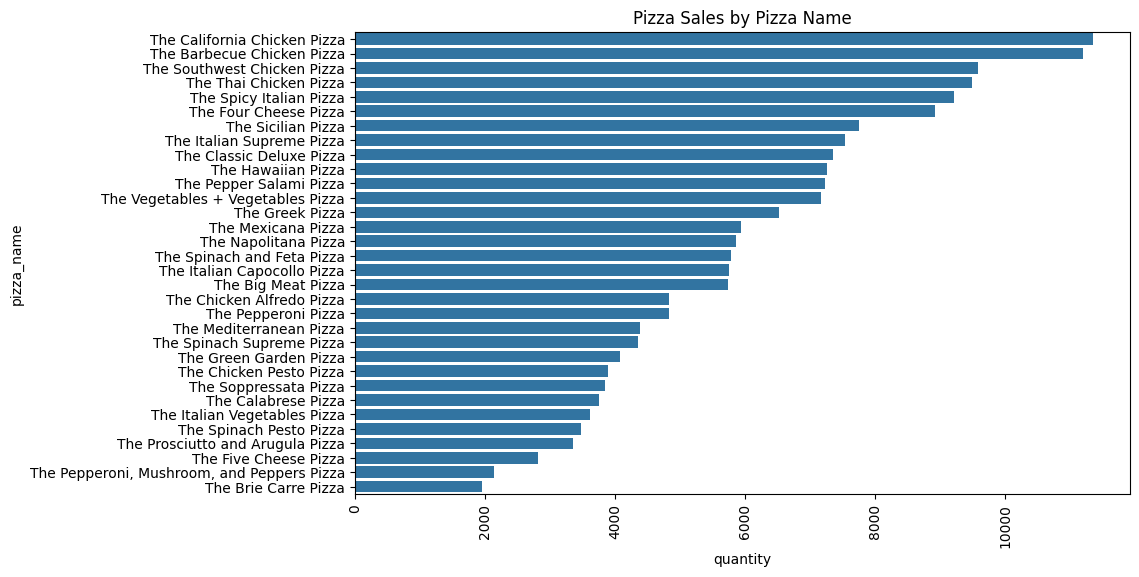

In [ ]:
# pizza sales by pizza name group by pizza name and use barplot

pizza_sales = df.groupby('pizza_name')['quantity'].sum().reset_index()
pizza_sales = pizza_sales.sort_values(by='quantity', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='quantity', y='pizza_name', data=pizza_sales) # for top 10 [pizza_sales.head(10)]
plt.xticks(rotation=90)
plt.xlabel('quantity')
plt.ylabel('pizza_name')
plt.title('Pizza Sales by Pizza Name')
plt.show()

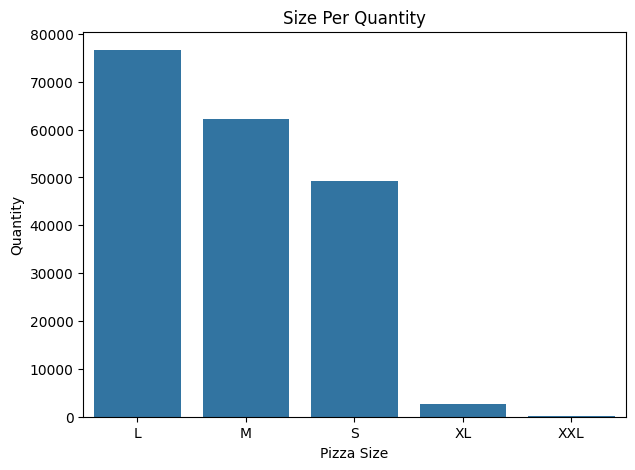

In [ ]:
# size per quantity

pizza_size = df.groupby('pizza_size')['quantity'].sum().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(x='pizza_size', y='quantity', data=pizza_size)
plt.xlabel('Pizza Size')
plt.ylabel('Quantity')
plt.title('Size Per Quantity')
plt.show()

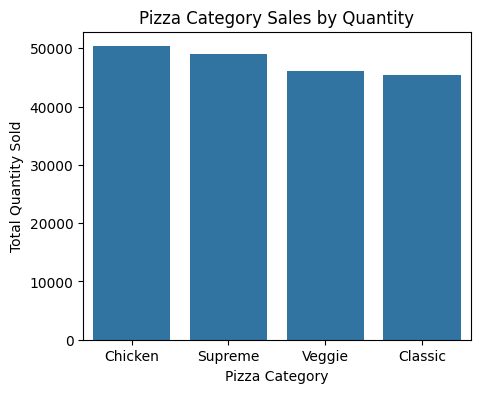

In [ ]:
# Calculate pizza category sales by quantity
pizza_category_sales = df.groupby('pizza_category')['quantity'].sum().reset_index()
pizza_category_sales = pizza_category_sales.sort_values(by='quantity', ascending=False)

# Create the bar plot
plt.figure(figsize=(5, 4))
sns.barplot(x='pizza_category', y='quantity', data=pizza_category_sales)

plt.xlabel('Pizza Category')
plt.ylabel('Total Quantity Sold')
plt.title('Pizza Category Sales by Quantity')
plt.show()

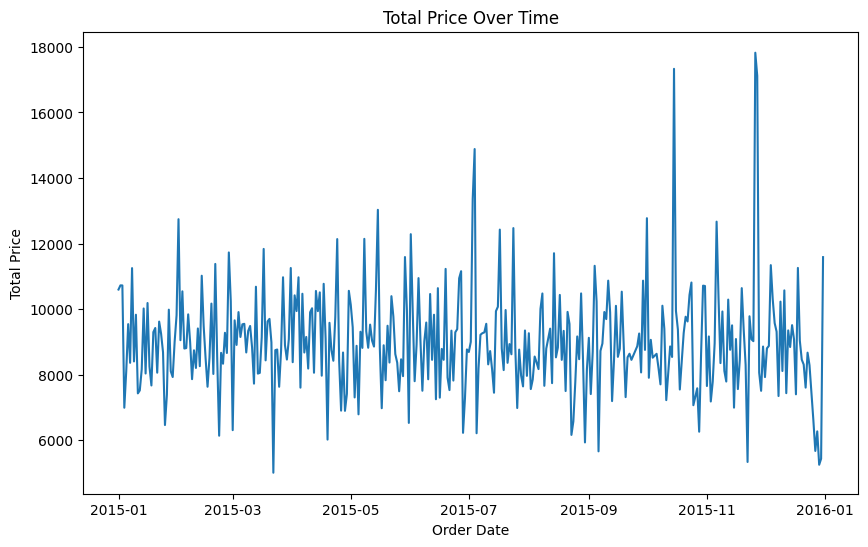

In [ ]:
sales_over_time = df.groupby('order_date')['total_price'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='order_date', y='total_price', data=sales_over_time)
plt.title('Total Price Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Price')
plt.show()

In [ ]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name',
       'Items_Qty_In_Grams', 'order_day_of_week', 'order_month_name',
       'week_of_year', 'order_year', 'holiday', 'promotion'],
      dtype='object')

## Seasonal trend analysis

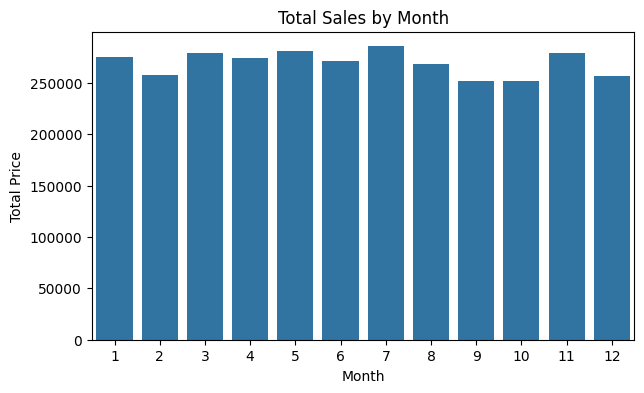

In [ ]:
# prompt: # order_month with total price eda

# order_month with total price eda
order_month_sales = df.groupby('order_month_name')['total_price'].sum().reset_index()
plt.figure(figsize=(7, 4))
sns.barplot(x='order_month_name', y='total_price', data=order_month_sales)
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.show()

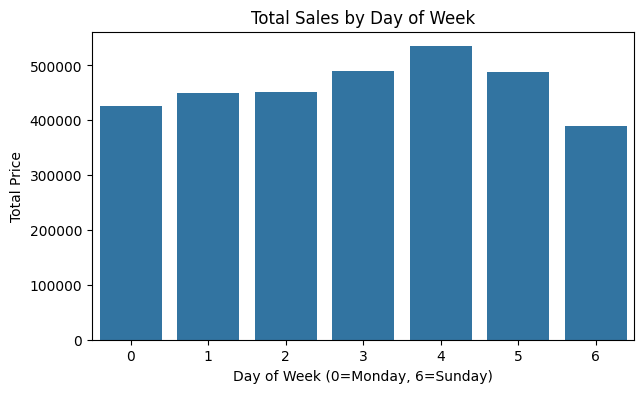

In [ ]:
# day of week with total price
sales_by_day = df.groupby('order_day_of_week')['total_price'].sum().reset_index()




# ['Monday-0', 'Tuesday-1', 'Wednesday-2', 'Thursday-3', 'Friday-4', 'Saturday-5', 'Sunday-6']
plt.figure(figsize=(7, 4))
sns.barplot(x='order_day_of_week', y='total_price', data=sales_by_day)
plt.title('Total Sales by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Total Price')
plt.show()

## Finding Coorelation

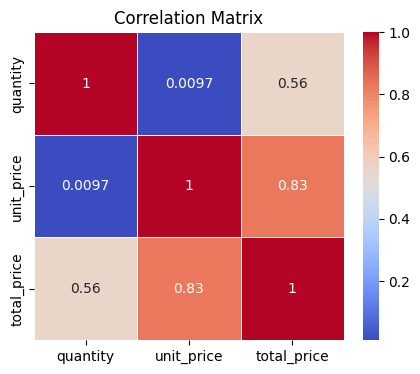

In [ ]:
# Correlation matrix using Heat Map
corr_matrix = df[['quantity', 'unit_price', 'total_price']].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
corr_matrix

,quantity,unit_price,total_price
quantity,1.000000,0.009684,0.556204
unit_price,0.009684,1.000000,0.828597
total_price,0.556204,0.828597,1.000000


# 6) Model Selection


1. ARIMA  (AutoRegressive Integrated Moving Average)
2. SARIMA (Seasonal AutoRegressive Integrated Moving Average)
3. Regression Model
4. LSTM


## ARIMA (AutoRegressive Integrated Moving Average)

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.0 MB/s eta 0:00:00


In [ ]:
!pip install statsmodels

In [ ]:
import itertools
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


In [ ]:
# Replacing pizza_sales with df to access the 'order_date' column
df['order_date'] = pd.to_datetime(df['order_date'])
weekly_sales = df.resample('W', on='order_date')['quantity'].sum()

# Train-test split
train_size = int(0.8 * len(weekly_sales))
train, test = weekly_sales[:train_size], weekly_sales[train_size:]

# Function to find the best ARIMA model
def best_arima(train, test):
    results = []
    for p, d, q in itertools.product(range(3), range(2), range(3)):  # Small range for speed
        model = ARIMA(train, order=(p, d, q)).fit()
        pred = model.forecast(len(test))
        error = np.mean(np.abs((test - pred) / test))  # MAPE
        results.append((error, pred, (p, d, q)))

    best_mape, best_pred, best_params = min(results, key=lambda x: x[0])
    print(f"Best ARIMA: {best_params}, MAPE: {best_mape:.4f}")
    return pd.Series(best_pred, index=test.index)



In [ ]:
# Get predictions
predictions = best_arima(train, test)
predictions

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best ARIMA: (2, 0, 2), MAPE: 0.1894


,predicted_mean
order_date,
2015-10-25,3353.883411
2015-11-01,3549.778904
2015-11-08,3677.800937
2015-11-15,3707.785329
2015-11-22,3678.680202
2015-11-29,3639.087322
2015-12-06,3615.968935
2015-12-13,3612.409428
2015-12-20,3619.348276


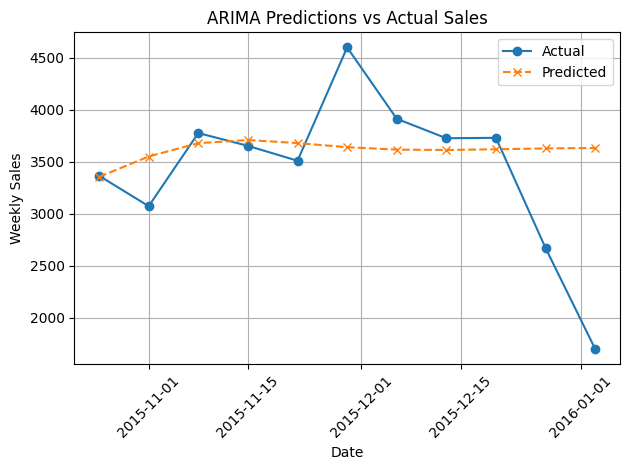

In [ ]:
# Plot
plt.plot(test, label='Actual', marker='o')
plt.plot(predictions, label='Predicted', linestyle='--', marker='x')
plt.title('ARIMA Predictions vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## SARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming 'df' is your main DataFrame containing 'order_date' and 'quantity'
# Prepare weekly sales data using 'df' instead of 'pizza_sales'
df['order_date'] = pd.to_datetime(df['order_date'])
weekly_sales = df.resample('W', on='order_date')['quantity'].sum()

# Train-test split
train_size = int(0.8 * len(weekly_sales))
train, test = weekly_sales[:train_size], weekly_sales[train_size:]

# Train SARIMA model
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7)).fit(disp=False)
predictions = model.forecast(len(test))

# MAPE calculation
mape = np.mean(np.abs((test - predictions) / test))
print(f"SARIMA MAPE: {mape:.4f}")

SARIMA MAPE: 0.1849


In [ ]:
predictions

,predicted_mean
2015-10-25,3251.125620
2015-11-01,3647.292267
2015-11-08,3407.561476
2015-11-15,2750.099059
2015-11-22,3590.353369
2015-11-29,3084.831400
2015-12-06,3327.425469
2015-12-13,3155.896996
2015-12-20,3475.639785
2015-12-27,3266.273813


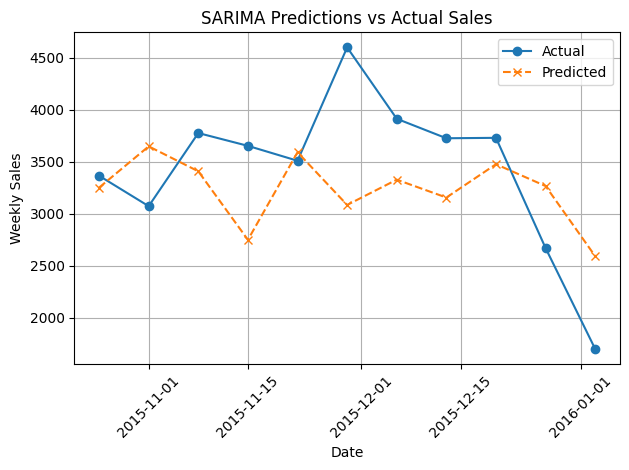

In [ ]:
# Plot results
plt.plot(test, label='Actual', marker='o')
plt.plot(test.index, predictions, label='Predicted', linestyle='--', marker='x')
plt.title('SARIMA Predictions vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Regression Model - Linear Model


In [ ]:
# Pizza sales by week
def prepare_weekly_sales(df):
    # Assuming 'order_date' is already a datetime column
    weekly_sales = df.groupby(df['order_date'].dt.to_period('W').apply(lambda r: r.start_time))['quantity'].sum().reset_index()
    return weekly_sales

# Feature Engineering for Regression
def create_regression_features(df):
    df['week_of_year'] = df['order_date'].dt.isocalendar().week
    df['day_of_week'] = df['order_date'].dt.dayofweek
    df['month'] = df['order_date'].dt.month
    df['year'] = df['order_date'].dt.year
    return df

# Use the original DataFrame 'df' instead of 'pizza_sales'
pizza_sales_weekly = prepare_weekly_sales(df)  # Changed from pizza_sales to df
pizza_sales_weekly = create_regression_features(pizza_sales_weekly)

# train test split
train_size = int(0.8 * len(pizza_sales_weekly))
train, test = pizza_sales_weekly[:train_size], pizza_sales_weekly[train_size:]

# Prepareing data for Regression
X_train = train[['week_of_year', 'day_of_week', 'month', 'year']]
y_train = train['quantity']
X_test = test[['week_of_year', 'day_of_week', 'month', 'year']]
y_test = test['quantity']

# Importing LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression  # This line is added to import LinearRegression

# Function to calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(actual, predicted):  # Renamed mape to calculate_mape
    return np.mean(np.abs((actual - predicted) / actual))

# Best Regression Model Training and Output
def best_regression_model(X_train, y_train, X_test, y_test):
    model = LinearRegression()  # Now LinearRegression is defined
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    regression_mape = calculate_mape(y_test, predictions) # Using calculate_mape instead of mape

    print(f"Best Regression Model MAPE: {regression_mape:.4f}")
    return predictions, regression_mape

# Train and evaluate the Regression model
regression_predictions, regression_mape_score = best_regression_model(X_train, y_train, X_test, y_test)

Best Regression Model MAPE: 0.1911


Predictions:
order_date
2015-10-19    3545.287304
2015-10-26    3530.562085
2015-11-02    3552.361183
2015-11-09    3537.635964
2015-11-16    3522.910745
2015-11-23    3508.185526
2015-11-30    3493.460307
2015-12-07    3515.259404
2015-12-14    3500.534185
2015-12-21    3485.808966
2015-12-28    3471.083747
dtype: float64


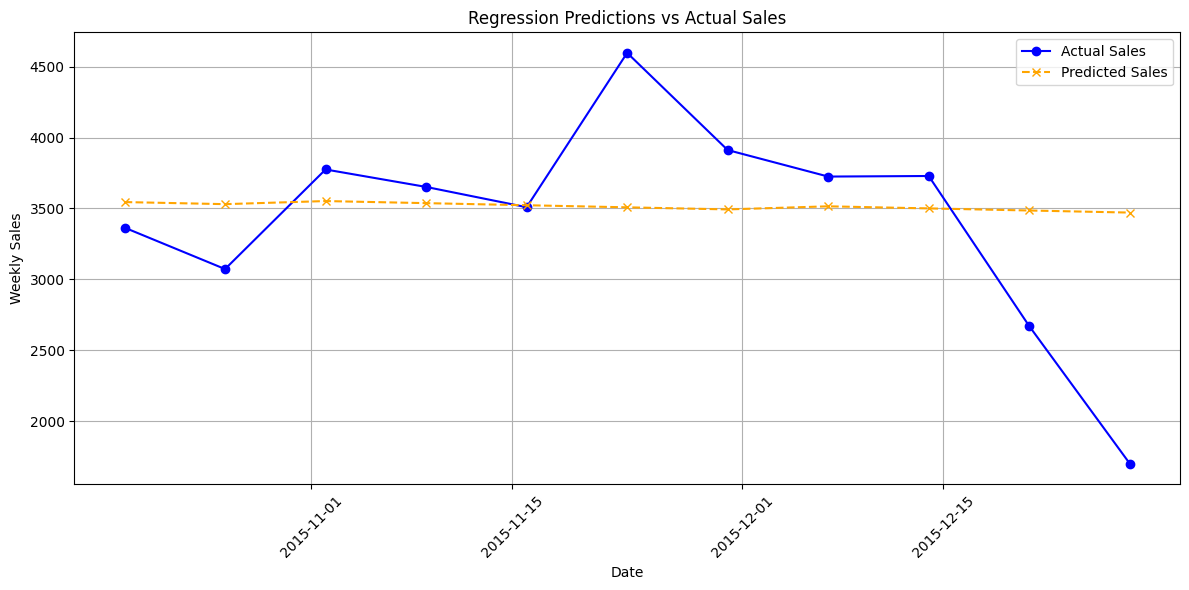

In [ ]:
# Formating the predictions for display
regression_predictions = pd.Series(regression_predictions, index=test['order_date'])

print("Predictions:")
print(regression_predictions)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test['order_date'], y_test, label='Actual Sales', color='blue', marker='o')
plt.plot(regression_predictions.index, regression_predictions, label='Predicted Sales', color='orange', linestyle='--', marker='x')
plt.title('Regression Predictions vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Function to aggregate sales by week
def prepare_weekly_sales(df):
    df['order_date'] = pd.to_datetime(df['order_date'])
    weekly_sales = df.groupby(df['order_date'].dt.to_period('W').apply(lambda r: r.start_time))['quantity'].sum().reset_index()
    return weekly_sales

# Convert transaction data to weekly sales
pizza_sales_weekly = prepare_weekly_sales(df)


In [ ]:
# Splitting data into training and testing sets
train_size = int(0.8 * len(pizza_sales_weekly))
train, test = pizza_sales_weekly[:train_size], pizza_sales_weekly[train_size:]

# Normalizing the data using MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train[['quantity']])
test_scaled = scaler.transform(test[['quantity']])



In [ ]:
# Function to create sequences for LSTM
def create_lstm_dataset(data, time_steps=3):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Prepare input and output sequences
time_steps = 3
X_train, y_train = create_lstm_dataset(train_scaled, time_steps)
X_test, y_test = create_lstm_dataset(test_scaled, time_steps)

# Reshape data to fit LSTM input
X_train = X_train.reshape(-1, time_steps, 1)
X_test = X_test.reshape(-1, time_steps, 1)


In [ ]:
# Define LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)


In [ ]:
# Generate predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


In [ ]:
# Function to calculate Mean Absolute Percentage Error (MAPE)
def mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))

# Calculate MAPE score
lstm_mape = mape(y_test_rescaled, predictions)


In [ ]:
# Convert predictions into a pandas Series for display
lstm_predictions = pd.Series(predictions.flatten(), index=test['order_date'][time_steps:])

# Print results
print(f"Best LSTM Model MAPE: {lstm_mape:.4f}")
print("Predictions:")
print(lstm_predictions)


Best LSTM Model MAPE: 0.2298
Predictions:
order_date
2015-11-09    3439.179443
2015-11-16    3502.690186
2015-11-23    3630.691406
2015-11-30    3810.456543
2015-12-07    3891.208496
2015-12-14    3993.498047
2015-12-21    3738.508057
2015-12-28    3450.000244
dtype: float32


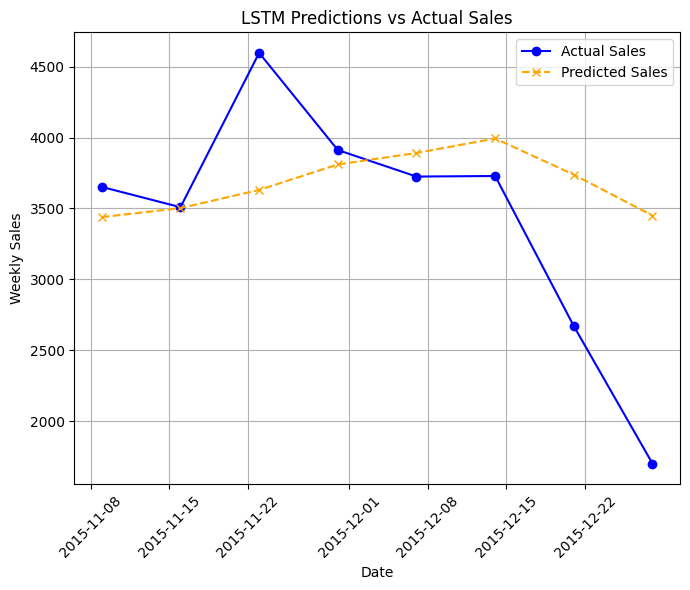

In [ ]:
# Plot actual vs predicted sales
plt.figure(figsize=(7, 6))
plt.plot(test['order_date'][time_steps:], y_test_rescaled, label='Actual Sales', marker='o', color='blue')
plt.plot(lstm_predictions.index, lstm_predictions, label='Predicted Sales', marker='x', linestyle='--', color='orange')
plt.title('LSTM Predictions vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


# 7) Choosing the Best Model

In [ ]:
import pandas as pd

# Model results as a dictionary
model_performance = {
    'Model': ['SARIMA', 'ARIMA', 'Regression','LSTM'],
    'MAPE': [0.1849, 0.1894, 0.1911, 0.2304]
}

# Createing a DataFrame
df_performance = pd.DataFrame(model_performance)
df_performance['Rank'] = df_performance['MAPE'].rank()
df_performance = df_performance.sort_values('MAPE', ascending=True)

# Display table
df_performance

,Model,MAPE,Rank
0,SARIMA,0.1849,1.0
1,ARIMA,0.1894,2.0
2,Regression,0.1911,3.0
3,LSTM,0.2304,4.0


# 8) Taking Best model and Forcasting it based on weeks

In [ ]:
# SARIMA Model forecasted sales for the week:

# Aggregateing pizza sales by week and pizza type
def prepare_weekly_sales_by_pizza(df):
    # Use the original DataFrame 'df' which contains 'order_date'
    df['order_date'] = pd.to_datetime(df['order_date'])
    df['week'] = df['order_date'].dt.to_period('W').apply(lambda r: r.start_time)
    weekly_sales_by_pizza = df.groupby(['week', 'pizza_name_id'])['quantity'].sum().reset_index()
    weekly_sales_by_pizza.set_index('week', inplace=True)
    return weekly_sales_by_pizza

# Change the function call to use the original DataFrame 'df'
pizza_sales_weekly_by_pizza = prepare_weekly_sales_by_pizza(df)  # Use 'df' instead of 'pizza_sales'


# Function to forecast for each pizza type
def forecast_sales_per_pizza_type(pizza_type, train, periods=1):
    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
    model_fit = model.fit(disp=False)

    # Forecasting for the next week
    forecast = model_fit.forecast(steps=periods)
    return pizza_type, forecast.tolist()

# Forecasting for each pizza type for the next week
def forecast_next_week_sales_by_pizza_type(pizza_sales_weekly_by_pizza, periods=1):
    pizza_type_forecasts = {}
    total_units_sold = pizza_sales_weekly_by_pizza.groupby('pizza_name_id')['quantity'].sum()

    # Last week in the dataset
    last_week = pizza_sales_weekly_by_pizza.index.max()
    next_week_start = last_week + pd.Timedelta(weeks=1)
    next_week_end = next_week_start + pd.Timedelta(days=6)

    # Looping through each pizza type
    for pizza_type in pizza_sales_weekly_by_pizza['pizza_name_id'].unique():
        pizza_type_data = pizza_sales_weekly_by_pizza[pizza_sales_weekly_by_pizza['pizza_name_id'] == pizza_type]

        # train test data
        train_size = int(0.8 * len(pizza_type_data))
        train = pizza_type_data[:train_size]['quantity']
        pizza_type, forecast = forecast_sales_per_pizza_type(pizza_type, train, periods)

        if forecast:
            pizza_type_forecasts[pizza_type] = forecast[0]  # Access the first value of the forecast list

    return pizza_type_forecasts, total_units_sold, next_week_start, next_week_end

# Forecasting pizza sales for the next week
next_week_pizza_sales_forecasts, total_units_sold, next_week_start, next_week_end = forecast_next_week_sales_by_pizza_type(pizza_sales_weekly_by_pizza, periods=1)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON 

In [ ]:
print(f"Forecasted sales for the week {next_week_start.date()} to {next_week_end.date()}:")

total_forecasted_quantity = 0

for pizza_type, forecast in next_week_pizza_sales_forecasts.items():
    forecast = int(forecast)
    next_week_pizza_sales_forecasts[pizza_type]=forecast
    print(f'{pizza_type}: {forecast} pizzas')
    total_forecasted_quantity += forecast

Forecasted sales for the week 2016-01-04 to 2016-01-10:
bbq_ckn_l: 82 pizzas
bbq_ckn_m: 95 pizzas
bbq_ckn_s: 39 pizzas
big_meat_s: 89 pizzas
brie_carre_s: 56 pizzas
calabrese_m: 40 pizzas
calabrese_s: 6 pizzas
cali_ckn_l: 83 pizzas
cali_ckn_m: 56 pizzas
cali_ckn_s: 38 pizzas
ckn_alfredo_l: 9 pizzas
ckn_alfredo_m: 58 pizzas
ckn_alfredo_s: 11 pizzas
ckn_pesto_l: 31 pizzas
ckn_pesto_m: 14 pizzas
ckn_pesto_s: 14 pizzas
classic_dlx_l: 19 pizzas
classic_dlx_m: 72 pizzas
classic_dlx_s: 39 pizzas
five_cheese_l: 55 pizzas
four_cheese_l: 149 pizzas
four_cheese_m: 44 pizzas
green_garden_l: 2 pizzas
green_garden_m: 28 pizzas
green_garden_s: 46 pizzas
hawaiian_l: 48 pizzas
hawaiian_m: 20 pizzas
hawaiian_s: 46 pizzas
ital_cpcllo_l: 60 pizzas
ital_cpcllo_m: 37 pizzas
ital_cpcllo_s: 26 pizzas
ital_supr_l: 61 pizzas
ital_supr_m: 49 pizzas
ital_supr_s: 3 pizzas
ital_veggie_l: 16 pizzas
ital_veggie_m: 25 pizzas
ital_veggie_s: 16 pizzas
mediterraneo_l: 37 pizzas
mediterraneo_m: 29 pizzas
mediterraneo_s: 1

In [ ]:
# Displaying the total quantity of units sold in the predicted week
print(f"Total quantity of units sold in the predicted week: {total_forecasted_quantity} pizzas")

Total quantity of units sold in the predicted week: 3372 pizzas


# 9) Sarima Evaluation Hyper Parameter Tuning

In [ ]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd  # Import pandas for to_datetime

# Assuming 'df' is your main DataFrame containing 'order_date' and 'quantity'
# Prepare weekly sales data using 'df' instead of 'pizza_sales'
df['order_date'] = pd.to_datetime(df['order_date'])  # Convert to datetime
weekly_sales = df.resample('W', on='order_date')['quantity'].sum()

# Train-test split
train_size = int(0.8 * len(weekly_sales))
train, test = weekly_sales[:train_size], weekly_sales[train_size:]


# Define the p, d, q and seasonal parameters ranges for hyperparameter tuning
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)
P = range(0, 2)
D = range(0, 2)
Q = range(0, 2)
s = [7] # Weekly seasonality

# Generate all possible combinations of parameters
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], s[0]) for x in list(itertools.product(P, D, Q))]

# Function to evaluate a SARIMA model
def evaluate_sarima_model(train, pdq_params, seasonal_pdq_params):
    try:
        model = SARIMAX(train, order=pdq_params, seasonal_order=seasonal_pdq_params)
        model_fit = model.fit(disp=False)
        aic = model_fit.aic
        return aic
    except:
        return float('inf') # Return infinity for invalid model combinations


# Perform hyperparameter tuning
best_aic = float('inf')
best_pdq = None
best_seasonal_pdq = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        temp_model_aic = evaluate_sarima_model(train, param, param_seasonal)
        if temp_model_aic < best_aic:
            best_aic = temp_model_aic
            best_pdq = param
            best_seasonal_pdq = param_seasonal

print(f'Best SARIMA: {best_pdq}x{best_seasonal_pdq}, AIC: {best_aic}')
# Train the model with best parameters
best_model = SARIMAX(train, order=best_pdq, seasonal_order=best_seasonal_pdq) # Use the correct 'train' data
best_model_fit = best_model.fit(disp=False)

# Make predictions using the best model
predictions = best_model_fit.forecast(len(test))

# ... (rest of your code for evaluation, plotting, etc.)

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

Best SARIMA: (0, 1, 1)x(0, 1, 0, 7), AIC: 504.69313188172913


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima # Importing auto_arima from pmdarima

# Useing auto_arima to find the best parameters
auto_model = auto_arima(train, seasonal=True, m=7, trace=True, error_action='ignore', suppress_warnings=True)
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[7]             : AIC=511.689, Time=0.43 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=514.308, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=505.442, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=505.959, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=505.737, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=506.854, Time=0.20 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=507.009, Time=0.14 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=505.011, Time=0.10 sec
 ARIMA(1,1,0)(0,1,2)[7]             : AIC=507.009, Time=0.21 sec
 ARIMA(1,1,0)(1,1,2)[7]             : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=515.380, Time=0.09 sec
 ARIMA(2,1,0)(0,1,1)[7]             : AIC=506.879, Time=0.15 sec
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=506.392, Time=0.15 sec
 ARIMA(2,1,1)(0,1,1)[7]             : AIC=508.027, Time=0.20 sec
 ARIMA(1,1,0)(0,1,1)[7] intercept   : AIC=505.395, 

# 10) Saving The model In pickle

In [ ]:
import pickle # Importing pickle for saving the model

# Save the model to a file using pickle
model_filename = 'best_sarima_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(auto_model, file)
print(f"Model saved as {model_filename}")

Model saved as best_sarima_model.pkl


In [ ]:
# Load the model from the file using pickle
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)
print("Model loaded successfully.")

Model loaded successfully.


# 11) Final Model and The Predictions for the SARIMA

In [ ]:
# Loading the model
model_filename = 'best_sarima_model.pkl'
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Forecasting function
def forecast_sales(loaded_model, periods):
    forecast = loaded_model.predict(n_periods=periods)
    return forecast

forecasted_sales = forecast_sales(loaded_model, periods=7)
print(forecasted_sales)

2015-10-25    3213.580073
2015-11-01    3760.607880
2015-11-08    3370.263289
2015-11-15    2900.604063
2015-11-22    3582.850124
2015-11-29    3194.747227
2015-12-06    3349.252532
Freq: W-SUN, dtype: float64


# 12) Visualization

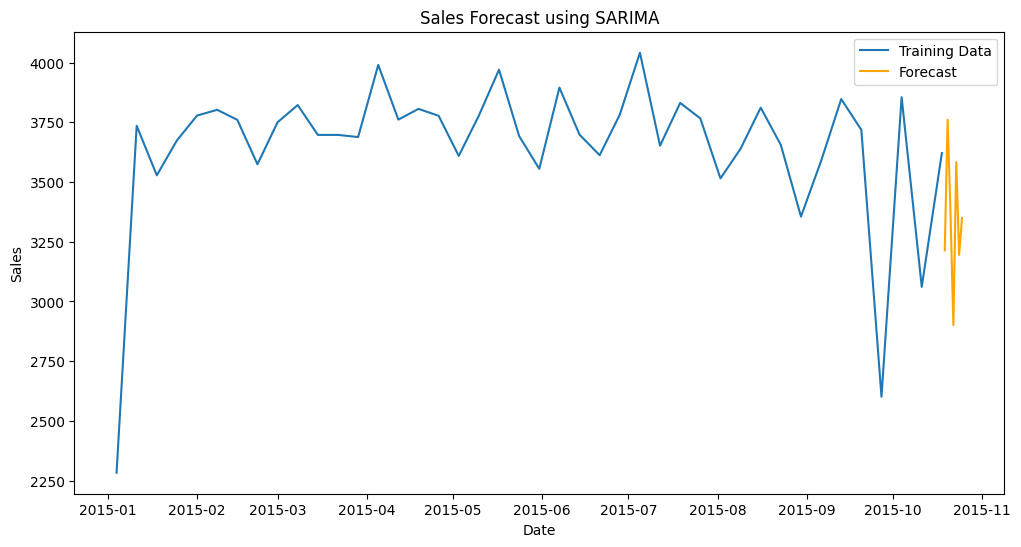

In [ ]:
# Loading the best model
with open('best_sarima_model.pkl', 'rb') as file:
    best_model = pickle.load(file)

# Forecasting the data
n_forecast = 7
forecast = best_model.predict(n_periods=n_forecast)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(pd.date_range(start=train.index[-1] + pd.Timedelta(days=1), periods=n_forecast), forecast, label='Forecast', color='orange')
plt.title('Sales Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
# Displaying the total quantity of predicted ingredients

# Copy ingredients, map predicted sales, and calculateing the total ingredient quantity
ingredients_predicted = ingredients.copy() # Changed from ingredients_dataset to ingredients
ingredients_predicted['predicted_quantity'] = ingredients_predicted['pizza_name_id'].map(next_week_pizza_sales_forecasts) # Using 'next_week_pizza_sales_forecasts'
ingredients_predicted['total_ingredient_qty'] = ingredients_predicted['Items_Qty_In_Grams'] * ingredients_predicted['predicted_quantity']

# Sum of the quantities for each ingredient
ingredient_totals = ingredients_predicted.groupby('pizza_ingredients')['total_ingredient_qty'].sum().to_dict()
print("Total quantity of predicted ingredients for the following week:")
print(ingredient_totals)
ingredients_predicted

Total quantity of predicted ingredients for the following week:
{'?duja Salami': 2380.0, 'Alfredo Sauce': 1160.0, 'Anchovies': 2790.0, 'Artichokes': 9360.0, 'Arugula': 760.0, 'Asiago Cheese': 5830.0, 'Bacon': 24780.0, 'Barbecue Sauce': 2375.0, 'Barbecued Chicken': 6910.0, 'Beef Chuck Roast': 11230.0, 'Blue Cheese': 1650.0, 'Brie Carre Cheese': 1680.0, 'Calabrese Salami': 14200.0, 'Capocollo': 57850.0, 'Caramelized Onions': 896.0, 'Chicken': 77650.0, 'Chipotle Sauce': 7180.0, 'Chorizo Sausage': 4450.0, 'Cilantro': 3590.0, 'Coarse Sicilian Salami': 12560.0, 'Corn': 23970.0, 'Eggplant': 2280.0, 'Feta Cheese': 10350.0, 'Fontina Cheese': 5140.0, 'Friggitello Peppers': 595.0, 'Garlic': 22985.0, 'Genoa Salami': 8010.0, 'Goat Cheese': 12120.0, 'Gorgonzola Piccante Cheese': 6840.0, 'Gouda Cheese': 3990.0, 'Green Olives': 4520.0, 'Green Peppers': 6495.0, 'Italian Sausage': 890.0, 'Jalapeno Peppers': 5585.0, 'Kalamata Olives': 3260.0, 'Luganega Sausage': 6280.0, 'Mozzarella Cheese': 11780.0, 'Mus

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams,predicted_quantity,total_ingredient_qty
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0,82,3280.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0,82,1230.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0,82,1640.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0,82,2460.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0,82,4920.0
...,...,...,...,...,...,...
513,veggie_veg_s,The Vegetables + Vegetables Pizza,Green Peppers,20.0,40,800.0
514,veggie_veg_s,The Vegetables + Vegetables Pizza,Red Onions,20.0,40,800.0
515,veggie_veg_s,The Vegetables + Vegetables Pizza,Zucchini,10.0,40,400.0
516,veggie_veg_s,The Vegetables + Vegetables Pizza,Spinach,15.0,40,600.0


In [ ]:
ingredients_predicted.to_csv('ingredients_predicted.csv', index=False)